
<p align="center"><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true"></p><h1><font color='0B5345'> <center>

Informática II

 </center></font></h1>
<h2><font color='0B5345'> <center>
Parcial II: Computación numérica en python</center></font></h2>
<font  face="Courier New" size="3">

<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia - Bioingeniería</font></b> </center></p3>




Nombre: Laura Maria Alzate Vanegas

Cédula: 1036518185


Antes de iniciar leer cuidadosamente cada enunciado antes de responder y asegurarse de comprender completamente lo que se está solicitando. 

¡Buena suerte!

1. (50%) La electromiografía (EMG) es una técnica ampliamente utilizada en medicina y fisiología para estudiar la actividad eléctrica de los músculos. Esta actividad, conocida como electromiograma (EMG), se registra mediante electrodos colocados sobre la piel o dentro del músculo, y proporciona información valiosa sobre el funcionamiento del sistema neuromuscular.

Instrucciones:

Utilizando programación orientada a objetos, cargue dos archivos de señales de EMG que contenga datos de varios electrodos (canales).

- Cree un método que muestre la información de la señal, que describa la forma de la señal y sus dimensiones (ejemplo: número de puntos de tiempo y el número de canales)

- Defina un método que sea capaz de graficar cada par de canales de EMG en un subplot con un tamaño adecuado. El número de canales es par, por lo tanto debe organizar los subplots en una matriz de dimensiones (numerodecanales/2, numerodecanales/2). Cada canal debe tener un color distinto en el gráfico.

- Los gráficos deben tener títulos, labels, cuadrícula, nombres en los ejes y cambios en el grosor de la línea.
- Debe permitir al usuario ingresar los límites del eje x a graficar.
- En este caso el gráfico es datos vs tiempo

- Defina un método que identifique y muestre la información del valor máximo de amplitud de la señal por cada canal y archivo.

- Cree un método adicional que grafique una señal que represente el promedio de todos los canales de un archivo. Esta señal promedio debe tener un estilo de línea diferente y estar en un gráfico separado.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

In [2]:
class EMG:
    def __init__(self, archivo1, archivo2):
        self.archivo1 = archivo1
        self.archivo2 = archivo2
        self.data1 = None
        self.data2 = None
        self.cargarArchivo()

    def cargarArchivo(self):
        self.data1 = sio.loadmat(self.archivo1)
        self.data2 = sio.loadmat(self.archivo2)

    def mostrarInfo(self, data):
        tiempo = data['tiempo']
        emgdata = data['datos']
        numPuntos = tiempo.shape[1]
        numCanales = emgdata.shape[0]
        muestreo = 1 / (tiempo[0, 1] - tiempo[0, 0])  # Frecuencia de muestreo
        duracion = tiempo[0, -1] - tiempo[0, 0]  # Duración total de la señal
        print("Número de puntos de tiempo:", numPuntos)
        print("Número de canales:", numCanales)
        print("Frecuencia de muestreo:", muestreo, "Hz")
        print("Duración de la señal:", duracion, "segundos")
        print("Forma de la señal:", emgdata.shape)
    
    def plotCanales(self, data, xlim=None):
        tiempo = np.squeeze(data['tiempo'])
        emgdata = np.squeeze(data['datos'])
        numCanales = emgdata.shape[0]
        fig, axes = plt.subplots(numCanales // 2, 2, figsize=(12, 8))
        colors = plt.cm.viridis(np.linspace(0, 1, numCanales))
        
        for i in range(numCanales):
            row = i // 2
            col = i % 2
            ax = axes[row, col]
            ax.plot(tiempo, emgdata[i], color=colors[i], linewidth=1.5)
            ax.set_title(f"Canal {i+1}")
            ax.set_xlabel("Tiempo")
            ax.set_ylabel("Amplitud")
            ax.grid(True)
            if xlim:
                ax.set_xlim(xlim)
        plt.tight_layout()
        plt.show()

    def maxAmpli(self, data):
        emgdata = data['datos']
        maxAmpli = np.max(emgdata, axis=1)
        for i, max_amp in enumerate(maxAmpli):
            print(f"Valor máximo de amplitud para canal {i+1}: {max_amp}")

    def promedioSenal(self, data):
        tiempo = np.squeeze(data['tiempo'])
        emgdata = data['datos']
        promsenal = np.mean(emgdata, axis=0)
        plt.figure(figsize=(8, 6))
        plt.plot(tiempo, promsenal, color='darkseagreen', linestyle='--', linewidth=2)
        plt.title("Señal Promedio de Todos los Canales")
        plt.xlabel("Tiempo")
        plt.ylabel("Amplitud")
        plt.grid(True)
        plt.show()

Número de puntos de tiempo: 63196
Número de canales: 8
Frecuencia de muestreo: 0.25 Hz
Duración de la señal: 65660.0 segundos
Forma de la señal: (8, 63196)


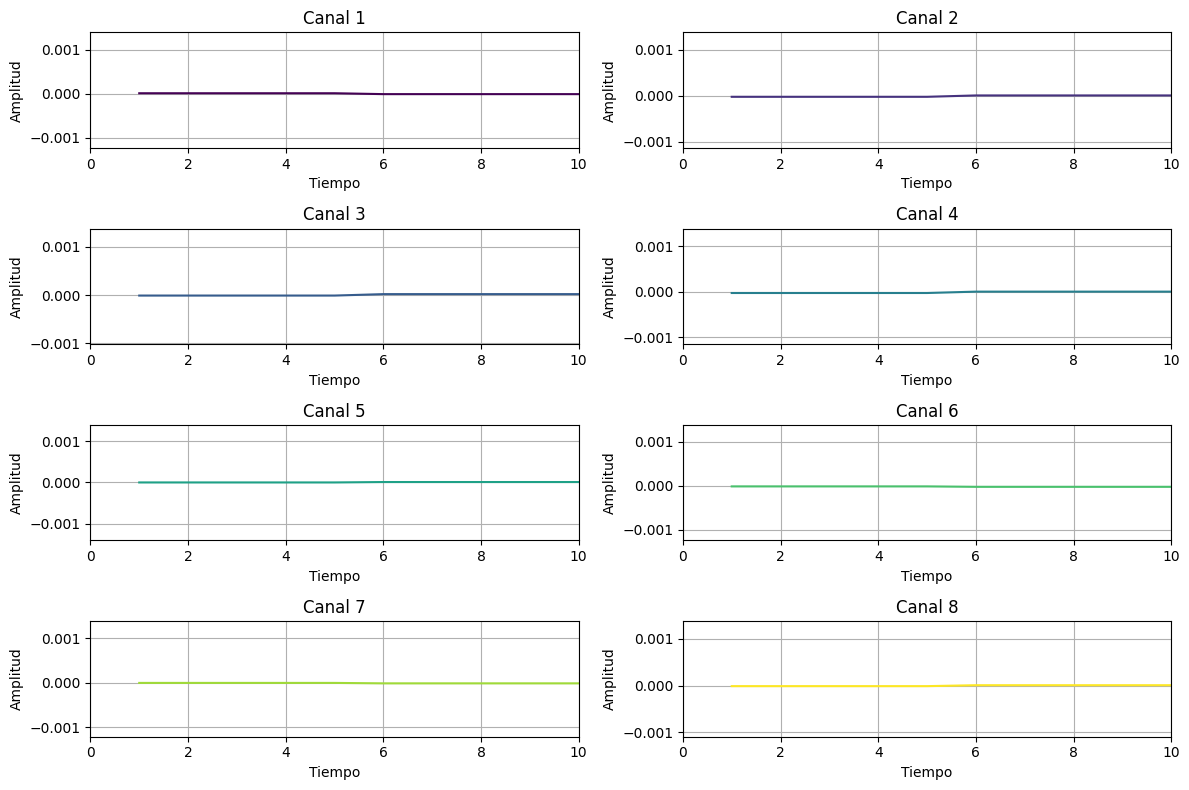

Valor máximo de amplitud para canal 1: 0.00127
Valor máximo de amplitud para canal 2: 0.00127
Valor máximo de amplitud para canal 3: 0.00127
Valor máximo de amplitud para canal 4: 0.00127
Valor máximo de amplitud para canal 5: 0.00127
Valor máximo de amplitud para canal 6: 0.00127
Valor máximo de amplitud para canal 7: 0.00127
Valor máximo de amplitud para canal 8: 0.00127


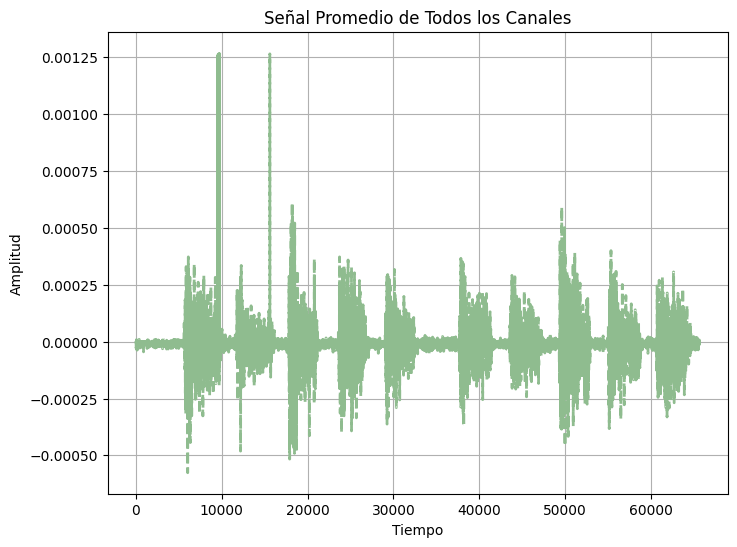

In [3]:
# Uso del código 1
senales = EMG("archivo1.mat", "archivo2.mat")
senales.mostrarInfo(senales.data1)
senales.plotCanales(senales.data1, xlim=(0, 10))
senales.maxAmpli(senales.data1)
senales.promedioSenal(senales.data1)

2. (20%) Utilice la librería NumPy para generar una serie de señales sinusoidales con las siguientes características:

- **Frecuencia de la señal: 1 Hz.**
- **Número de muestras: 1000.**
- **Rango de amplitud: entre 1 y 5 unidades.**

Genere un total de 5 señales sinusoidales, cada una con una amplitud aleatoria dentro del rango especificado.

Utilice la librería Matplotlib para graficar las 5 señales sinusoidales en una misma figura y cada señal debe estar etiquetada con su respectiva amplitud en la leyenda.

Incluya etiquetas adecuadas en los ejes x e y de la figura, así como un título descriptivo.

In [4]:
import numpy as np
import matplotlib.pyplot as pls

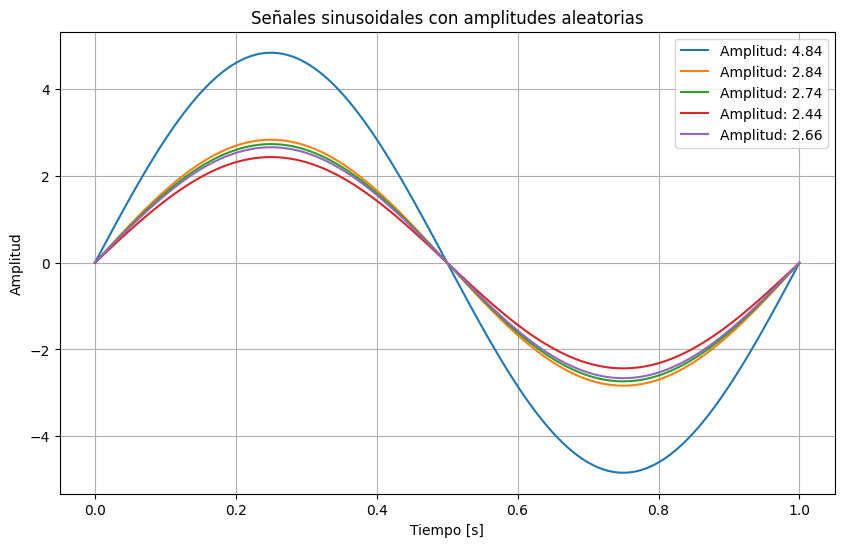

In [6]:
# Definir las características de las señales
frecuencia = 1  # Hz
numMuestras = 1000
rangoAmplitud = (1, 5)  # unidades
numSenales = 5

# Generar amplitudes aleatorias dentro del rango especificado
amplitudes = np.random.uniform(rangoAmplitud[0], rangoAmplitud[1], numSenales)

# Generar el tiempo para las muestras
tiempo = np.linspace(0, 1, numMuestras)

# Generar las señales sinusoidales
senoidales = [amplitud * np.sin(2 * np.pi * frecuencia * tiempo) for amplitud in amplitudes]

# Graficar las señales
plt.figure(figsize=(10, 6))
for i, senoidal in enumerate(senoidales):
    plt.plot(tiempo, senoidal, label=f'Amplitud: {amplitudes[i]:.2f}')
    
# Etiquetas y título
plt.title('Señales sinusoidales con amplitudes aleatorias')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

3. (30%) Cargue el conjunto de datos de dispositivos médicos desde el archivo CSV 'datos_dispositivos.csv' utilizando la biblioteca Pandas.
Realice un análisis exploratorio de los datos utilizando métodos y funciones de Pandas: 

- Muestre las primeras filas del DataFrame para entender su estructura.
- Verifique la información básica del DataFrame, como el número de filas y columnas, los tipos de datos de cada columna y la presencia de valores nulos.
- Filtre el dataframe según la clasificación de riesgo de los dispositivos y cree un nuevo dataframe para cada uno de ellos.
- Por medio de filtros y métodos de pandas identifique los diferentes fabricantes de los dispositivos de la bases de datos y cuantos dispositivos corresponden a cada uno de los fabricantes.

In [7]:
import pandas as pd
from tabulate import tabulate

In [8]:
# Cargar el conjunto de datos desde el archivo CSV
archivocsv = pd.read_csv('datos_dispositivos.csv')

# Muestre las primeras filas del DataFrame
print("Primeras filas del DataFrame:")
print(tabulate(archivocsv.head(), headers='keys', tablefmt='grid'))

# Verificar información básica del DataFrame
print("\nInformación básica del DataFrame:")
print(tabulate(archivocsv.info(), headers='keys', tablefmt='grid'))

# Filtrar el DataFrame según la clasificación de riesgo de los dispositivos y crear nuevos dataframes para cada uno
riesgoAlto = archivocsv[archivocsv['Clasificacion_riesgo'] == 'Alto']
riesgoMedio = archivocsv[archivocsv['Clasificacion_riesgo'] == 'Medio']
riesgoBajo = archivocsv[archivocsv['Clasificacion_riesgo'] == 'Bajo']

# Identificar los diferentes fabricantes de los dispositivos y cuántos dispositivos corresponden a cada uno de ellos
fabricantes_dispositivos = archivocsv['Fabricante'].value_counts().reset_index()
fabricantes_dispositivos.columns = ['Fabricante', 'Cantidad']

# Imprimir la tabla con tabulate
print("\nFabricantes de dispositivos y cantidad de dispositivos:")
print(tabulate(fabricantes_dispositivos, headers='keys', tablefmt='grid'))

Primeras filas del DataFrame:
+----+------+---------------------------+--------------+------------------------+
|    |   ID | Nombre_dispositivo        | Fabricante   | Clasificacion_riesgo   |
+====+======+===========================+==============+========================+
|  0 |    1 | Monitor de signos vitales | MedTech      | Bajo                   |
+----+------+---------------------------+--------------+------------------------+
|  1 |    2 | Desfibrilador             | LifeCare     | Moderado               |
+----+------+---------------------------+--------------+------------------------+
|  2 |    3 | Electrocardiograma        | CardioTech   | Alto                   |
+----+------+---------------------------+--------------+------------------------+
|  3 |    4 | Respirador                | RespiraCorp  | Bajo                   |
+----+------+---------------------------+--------------+------------------------+
|  4 |    5 | Bomba de infusión         | InfuseCo     | Moderado   

**Éxitos y recuerden que la entrega del parcial se realiza subiendo este notebook a su repositorio de github.**